In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import folium

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans

In [2]:
#loading data 
df = pd.read_csv('all_crimes_2022-2025.csv')
df.head()

Crime ID    Month  \
0  6b1be5a8275fcda2982f6de7bb92e03499d33c7fa6316b...  2022-03   
1  6b1be5a8275fcda2982f6de7bb92e03499d33c7fa6316b...  2022-03   
2  b466ed98f60835f379377cda209f72a65f4b594d64b8a6...  2022-03   
3  cc667a5d8c2fa4f30ade960d334d4c1feac01170092470...  2022-03   
4  a60d9d1cff047a67e9a22361a6aa27ad978ec0f71f482a...  2022-03   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service  -0.445898   
1  Metropolitan Police Service  Metropolitan Police Service  -0.445898   
2  Metropolitan Police Service  Metropolitan Police Service  -0.530681   
3  Metropolitan Police Service  Metropolitan Police Service   0.876572   
4  Metropolitan Police Service  Metropolitan Police Service   0.969845   

    Latitude                    Location  LSOA code     LSOA name  \
0  50.803304  On or near Lamorna Gardens  E01031422     Arun 008B   
1  50.803304  On or near Lamorna Gardens  E01031422     Arun 008B   
2  50.804178    On or near South Passage  E01031400     Arun 011A   
3  51.137084    On or near Shopping Area  E01024001  Ashford 009A   
4  51.124173   On or near Petrol Station  E01024013  Ashford 010A   

                     Crime type  \
0  Violence and sexual offences   
1  Violence and sexual offences   
2  Violence and sexual offences   
3         Theft from the person   
4  Violence and sexual offences   

                           Last outcome category  Context  
0                      Status update unavailable      NaN  
1                      Status update unavailable      NaN  
2  Investigation complete; no suspect identified      NaN  
3  Investigation complete; no suspect identified      NaN  
4                      Status update unavailable      NaN

In [3]:
# overview & cleaning 

print(f'rows (instances): {df.shape[0]}') 
print(f'columns (attributes): {df.columns}')                    
print(f'data types: {df.dtypes}')

print(f'null values: {df.isnull().sum()}')  # seems that context is always empty 
                                            # (number of nulls equals number of overall instances) 

rows (instances): 3386817
columns (attributes): Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')
data types: Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object
null values: Crime ID                  708618
Month                          0
Reported by                    0
Falls within                   0
Longitude                  46638
Latitude                   46638
Location                       0
LSOA code                  46639
LSOA name                  46639
Crime type 

In [4]:
# data statistics 
# crime types 
print(f"unique crime types: {df['Crime type'].nunique()}")
print(f"amounts per crime type: {df['Crime type'].value_counts()}")

# areas
print(f"unique areas: {df['LSOA name'].nunique()}")

crimes_per_area = df['Falls within'].value_counts()
print(f"crimes per area: {crimes_per_area}") # all fall within the Metropolitan Police Service


crimes_per_month = df['Month'].value_counts().sort_index()
print(f"crimes per month: {crimes_per_month}")


unique crime types: 14
amounts per crime type: Crime type
Violence and sexual offences    772724
Anti-social behaviour           708618
Other theft                     368214
Vehicle crime                   309177
Theft from the person           235723
Shoplifting                     186422
Public order                    169810
Criminal damage and arson       166537
Burglary                        161381
Drugs                           116327
Robbery                          94643
Bicycle theft                    49297
Other crime                      33627
Possession of weapons            14317
Name: count, dtype: int64
unique areas: 11098
crimes per area: Falls within
Metropolitan Police Service    3386817
Name: count, dtype: int64
crimes per month: Month
2022-03    107792
2022-04     85916
2022-05     95413
2022-06     92544
2022-07     96038
2022-08     93931
2022-09     85828
2022-10    111741
2022-11     89924
2022-12     82718
2023-01     87211
2023-02     83041
2023-03     928

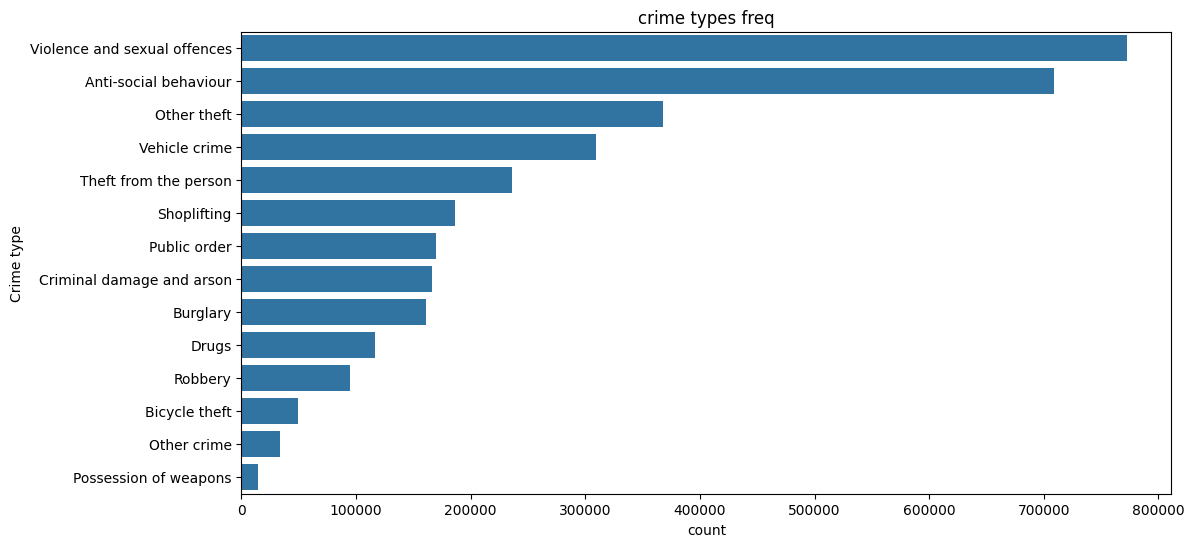

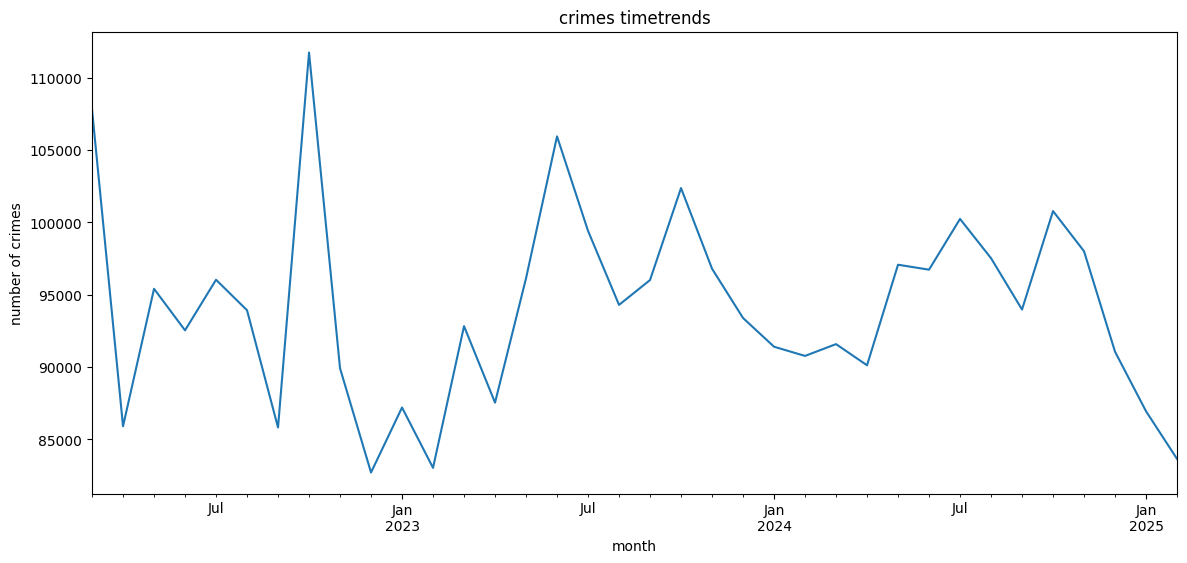

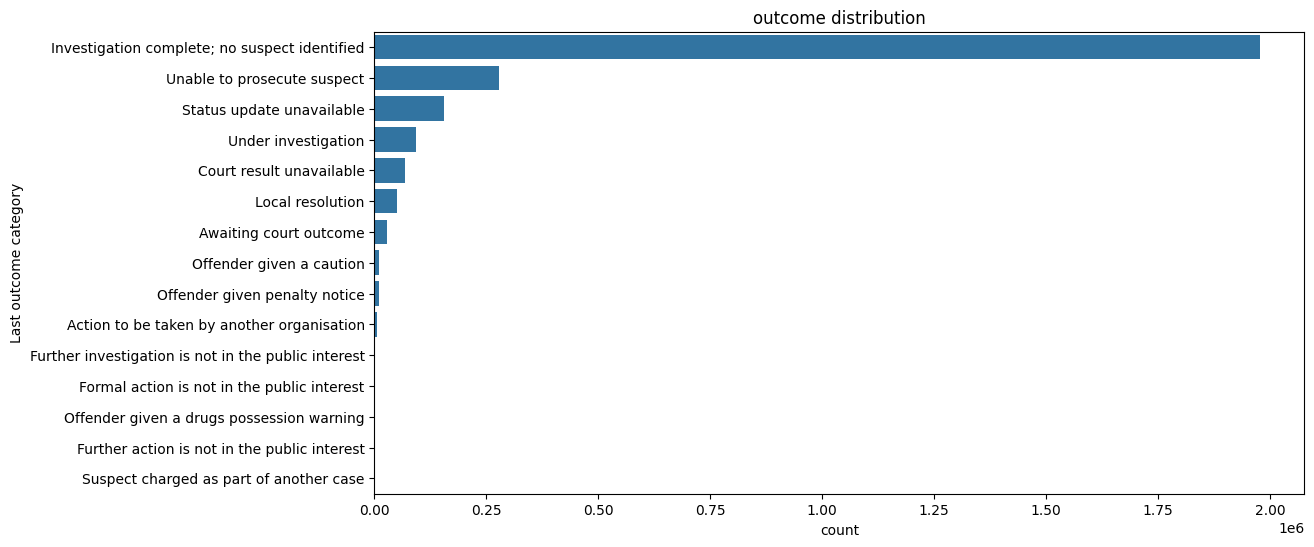

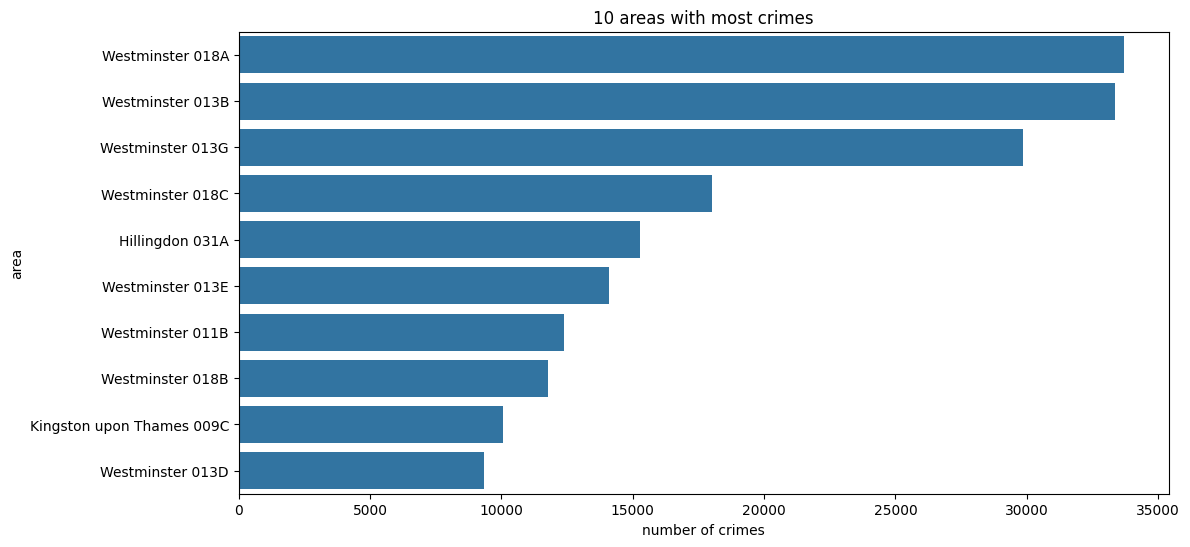

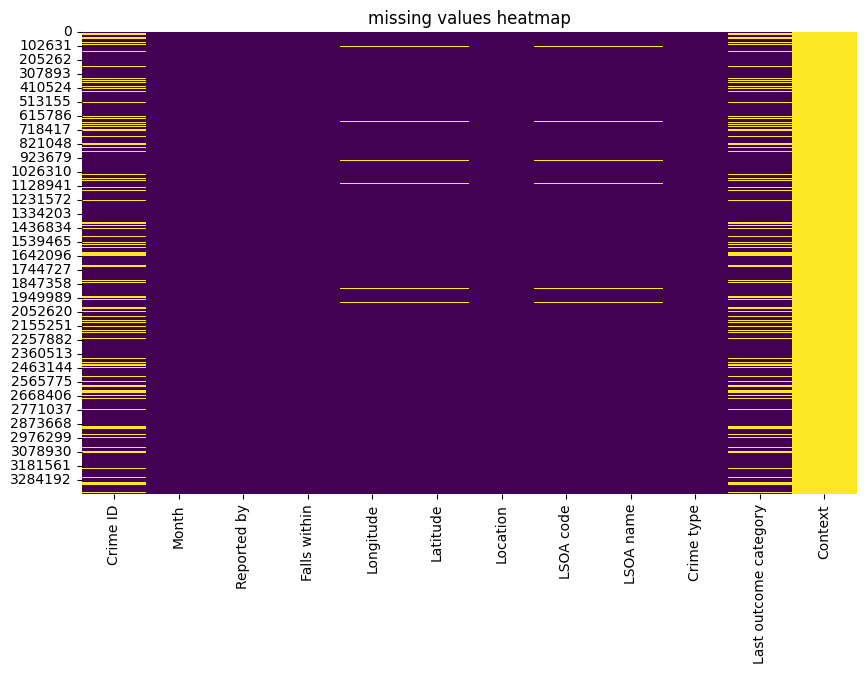

In [5]:
# data visualization
# crime types
plt.figure(figsize=(12,6)) 
sns.countplot(data=df, y='Crime type', order=df['Crime type'].value_counts().index)
plt.title('crime types freq')
plt.show()

# timetrends
df['Month'] = pd.to_datetime(df['Month'])
monthly_crimes = df.groupby(df['Month'].dt.to_period('M')).size()
monthly_crimes.plot(kind='line', figsize=(14,6))
plt.title('crimes timetrends')
plt.ylabel('number of crimes')
plt.xlabel('month')
plt.show()

# outcomes distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Last outcome category', order=df['Last outcome category'].value_counts().index)
plt.title('outcome distribution')
plt.show()

# crimes per area
top_areas = df['LSOA name'].value_counts().head(10) # grouped by LSOA number, can be changed to
                                                    # longitude and latitude combination or location 
                                                
plt.figure(figsize=(12,6))
sns.barplot(x=top_areas.values, y=top_areas.index)
plt.title('10 areas with most crimes')
plt.xlabel('number of crimes')
plt.ylabel('area')
plt.show()

# missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('missing values heatmap')
plt.show()



In [ ]:
# fig = px.scatter_mapbox(df,
#                         lat="Latitude",
#                         lon="Longitude",
#                         color="Crime type",
#                         hover_data=["Location", "Crime type"],
#                         zoom=10,
#                         height=600)

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()




# df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
# map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

# crime_map = folium.Map(location=map_center, zoom_start=12)
# for idx, row in df.iterrows():
#     folium.CircleMarker(
#         [row['Latitude'], row['Longitude']],
#         radius=2,
#         popup=row['Crime type'],
#         color='blue',
#         fill=True,
#         fill_opacity=0.5
#     ).add_to(crime_map)

# crime_map


2. Burglary and other crimes 

In [73]:
# df = pd.read_csv('all_crimes_2022-2025.csv')

crime_counts = df.groupby(['Month', 'LSOA code', 'Crime type']).size().reset_index(name='Count')

df_crimes = crime_counts.pivot_table(index=['Month', 'LSOA code'], # each crimes is now a column 
                                     columns='Crime type', 
                                     values='Count', 
                                     fill_value=0).reset_index()
df_crimes.head(20)

Crime type    Month  LSOA code  Anti-social behaviour  Bicycle theft  \
0           2022-03  E01000001                    0.0            0.0   
1           2022-03  E01000002                    0.0            0.0   
2           2022-03  E01000003                    0.0            0.0   
3           2022-03  E01000005                    2.0            0.0   
4           2022-03  E01000006                    0.0            0.0   
5           2022-03  E01000007                   14.0            1.0   
6           2022-03  E01000008                   18.0            0.0   
7           2022-03  E01000009                    6.0            0.0   
8           2022-03  E01000010                   70.0            1.0   
9           2022-03  E01000011                    6.0            0.0   
10          2022-03  E01000012                    4.0            0.0   
11          2022-03  E01000013                    2.0            0.0   
12          2022-03  E01000014                    4.0            0.0   
13          2022-03  E01000015                    6.0            0.0   
14          2022-03  E01000016                    0.0            0.0   
15          2022-03  E01000017                    2.0            0.0   
16          2022-03  E01000018                    4.0            0.0   
17          2022-03  E01000019                    4.0            0.0   
18          2022-03  E01000020                    6.0            0.0   
19          2022-03  E01000021                    2.0            0.0   

Crime type  Burglary  Criminal damage and arson  Drugs  Other crime  \
0                0.0                        0.0    0.0          0.0   
1                0.0                        0.0    0.0          0.0   
2                0.0                        0.0    0.0          0.0   
3                0.0                        0.0    0.0          1.0   
4                1.0                        0.0    1.0          0.0   
5                3.0                        1.0   11.0          1.0   
6                1.0                        0.0    1.0          0.0   
7                0.0                        3.0    5.0          0.0   
8                7.0                        9.0   12.0          1.0   
9                0.0                        1.0    2.0          1.0   
10               0.0                        1.0    0.0          0.0   
11               0.0                        2.0    2.0          1.0   
12               0.0                        2.0    0.0          0.0   
13               1.0                        0.0    2.0          0.0   
14               2.0                        0.0    1.0          0.0   
15               1.0                        0.0    1.0          0.0   
16               2.0                        2.0    0.0          0.0   
17               0.0                        0.0    0.0          1.0   
18               3.0                        1.0    2.0          0.0   
19               0.0                        0.0    1.0          0.0   

Crime type  Other theft  Possession of weapons  Public order  Robbery  \
0                   3.0                    0.0           0.0      0.0   
1                   0.0                    0.0           1.0      0.0   
2                   0.0                    0.0           0.0      0.0   
3                   3.0                    0.0           2.0      0.0   
4                   0.0                    0.0           0.0      3.0   
5                   4.0                    2.0           4.0      3.0   
6                   2.0                    0.0           5.0      0.0   
7                   2.0                    0.0           1.0      0.0   
8                  16.0                    1.0          14.0      5.0   
9                   1.0                    0.0           1.0      0.0   
10                  0.0                    0.0           0.0      0.0   
11                  4.0                    0.0           6.0      2.0   
12                  0.0                    0.0

Crime type
Burglary                        1.000000
Violence and sexual offences    0.369551
Other theft                     0.363797
Robbery                         0.359466
Anti-social behaviour           0.352088
Public order                    0.329939
Theft from the person           0.324024
Bicycle theft                   0.287042
Shoplifting                     0.283020
Criminal damage and arson       0.272651
Vehicle crime                   0.270035
Drugs                           0.259022
Possession of weapons           0.141972
Other crime                     0.041462
Name: Burglary, dtype: float64


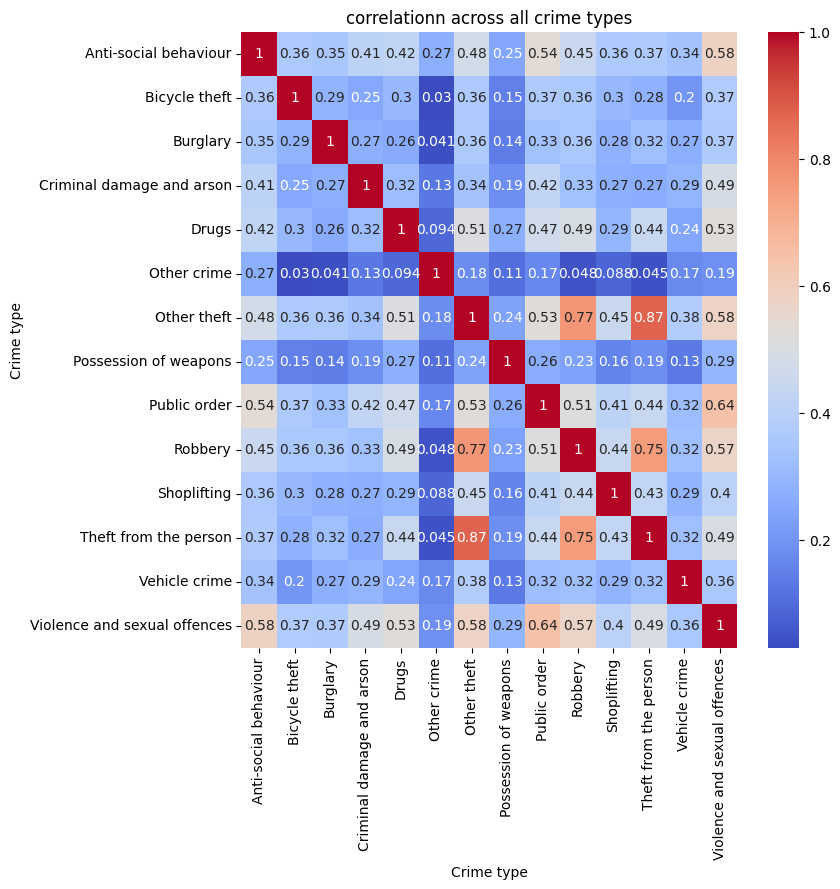

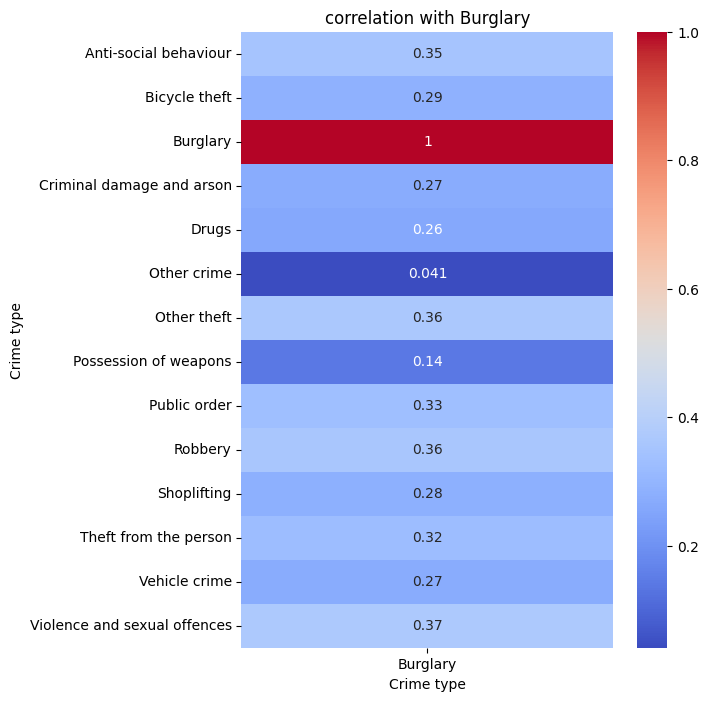

In [ ]:
# (general) simple correlation analysis
corr_matrix = df_crimes.drop(columns=['Month', 'LSOA code']).corr()

# math 
burglary_corr = corr_matrix['Burglary'].sort_values(ascending=False)
print(burglary_corr)

# vis

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('correlationn across all crime types')
plt.show()


plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix[['Burglary']], annot=True, cmap='coolwarm', cbar=True)
plt.title('correlation with Burglary')
plt.show()


c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value e

Crime type  Anti-social behaviour  Bicycle theft  Criminal damage and arson  \
E01000001                0.028571      -0.067884                  -0.162650   
E01000002               -0.140084      -0.073746                   0.163461   
E01000003               -0.026288      -0.172414                  -0.142255   
E01000005                0.022329      -0.066519                   0.130025   
E01000006                0.280017            NaN                  -0.152554   

Crime type     Drugs  Other crime  Other theft  Possession of weapons  \
E01000001        NaN          NaN    -0.016720                    NaN   
E01000002  -0.102378          NaN     0.042527                    NaN   
E01000003  -0.103807    -0.072282    -0.199950                    NaN   
E01000005   0.213705    -0.028364     0.038026              -0.159711   
E01000006   0.212879     0.004002     0.054545              -0.071351   

Crime type  Public order   Robbery  Shoplifting  Theft from the person  \
E01000001   

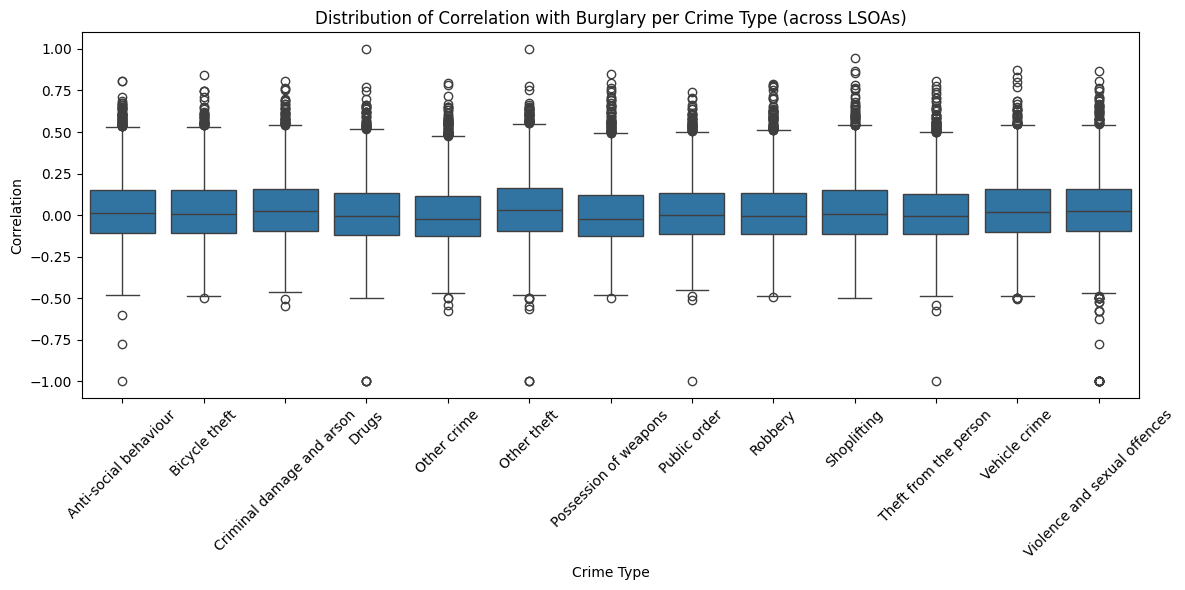

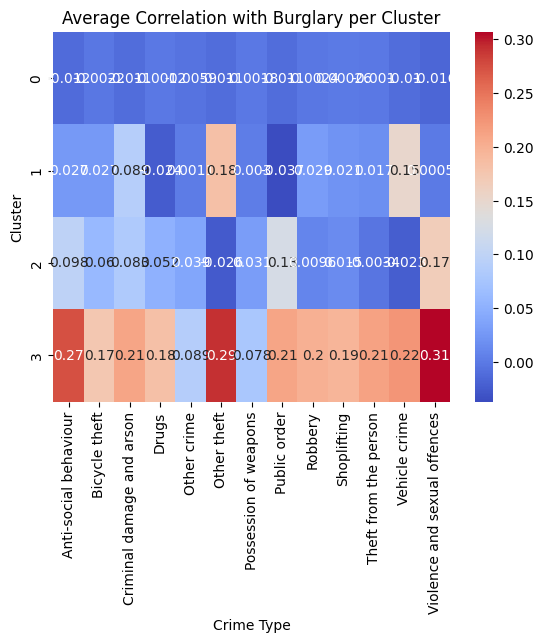

KeyError: 'Burglary'

In [ ]:
## (per LSOA across months) simple correlation analysis

from collections import defaultdict

results = defaultdict(dict)

for lsoa, group in df_crimes.groupby('LSOA code'): # group by LSOA code
    crime_data = group.drop(columns=['Month', 'LSOA code'])
    
    # if crime_data.shape[0] < 2:   # skip where there's not enough data
    #     continue

    corr = crime_data.corrwith(crime_data['Burglary'])
    results[lsoa] = corr.drop(labels='Burglary')  # drop self-correlation

lsoa_corr_df = pd.DataFrame(results).T 
print(lsoa_corr_df.head())


## summary stats
# simple summary stats
summary_stats = lsoa_corr_df.describe()
print("summary stats:")
print(summary_stats)

# ranking crimes by mean correlation with burglary
mean_corr = lsoa_corr_df.mean().sort_values(ascending=False)
print("ranking stats:")
print(mean_corr) # idea: highest mean correlation = most consistently associated with burglary

# vis (violin plots)
long_df = lsoa_corr_df.reset_index().melt(id_vars='index', 
                                          var_name='Crime Type', 
                                          value_name='Correlation')

plt.figure(figsize=(12, 6))
sns.boxplot(data=long_df, x='Crime Type', y='Correlation')
plt.xticks(rotation=45)
plt.title("Distribution of Correlation with Burglary per Crime Type (across LSOAs)")
plt.tight_layout()
plt.show()

# # clustring on correlation 
# lsoa_corr_clean = lsoa_corr_df.fillna(0)  # fill NaN values with 0

# kmeans = KMeans(n_clusters=4, random_state=0) # k-means clustering with 4 clusters
# lsoa_corr_clean['Cluster'] = kmeans.fit_predict(lsoa_corr_clean)

# cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=lsoa_corr_clean.columns[:-1])

# sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
# plt.title("avg correlation with burglary per cluster")
# plt.xlabel("crime type")
# plt.ylabel("cluster")
# plt.show()

# lsoa_corr_clean['Burglary Correlation'] = lsoa_corr_clean['Burglary']
# cluster_info = pd.DataFrame(columns=['Cluster', 'Crime Type', 'Average Correlation with Burglary'])

# for cluster_num in range(4):  # 4 clusters
#     cluster_data = lsoa_corr_clean[lsoa_corr_clean['Cluster'] == cluster_num]
    
#     for crime_type in cluster_data.columns[:-2]: # ecl burglary
#         avg_corr = cluster_data[crime_type].mean()
        
#         cluster_info = cluster_info.append({
#             'Cluster': cluster_num,
#             'Crime Type': crime_type,
#             'Average Correlation with Burglary': avg_corr
#         }, ignore_index=True)

# print(cluster_info)


<Figure size 1200x600 with 0 Axes>

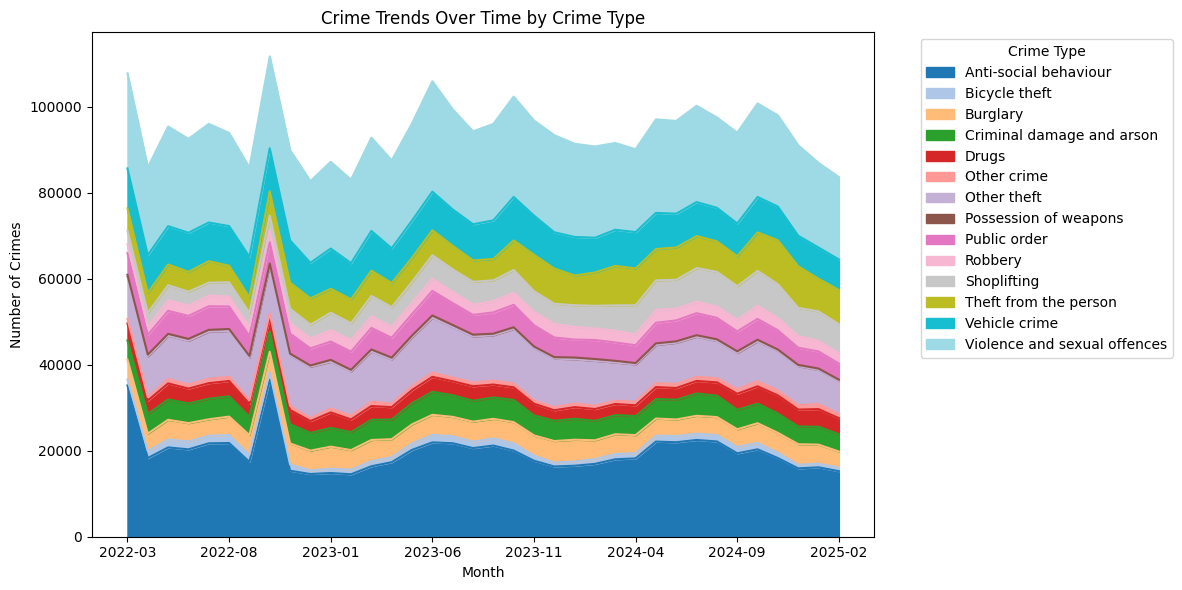

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the raw data with 'Month' and 'Crime type' columns
# Aggregate the data by month and crime type, counting occurrences
df_month_crime = df.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)

# Sort the DataFrame by month (if needed)
df_month_crime = df_month_crime.sort_index()

# Plotting the stacked line chart
plt.figure(figsize=(12, 6))
df_month_crime.plot(kind='area', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Crime Trends Over Time by Crime Type')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [82]:
# time series analysis (correlation over time)
monthly_df = df.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)
print(monthly_df.corrwith(monthly_df['Burglary']).sort_values(ascending=False))


Crime type
Burglary                        1.000000
Other theft                     0.540185
Vehicle crime                   0.472006
Robbery                         0.310200
Violence and sexual offences    0.169136
Possession of weapons           0.143877
Criminal damage and arson       0.104987
Theft from the person           0.036275
Drugs                          -0.023915
Public order                   -0.077347
Anti-social behaviour          -0.102606
Other crime                    -0.175368
Bicycle theft                  -0.203293
Shoplifting                    -0.251206
dtype: float64


In [83]:
mean_burglary = df_crimes['Burglary'].mean()
var_burglary = df_crimes['Burglary'].var()

print(f"mean of burglary: {mean_burglary}")
print(f"var of burglary: {var_burglary}")
if abs(var_burglary - mean_burglary) / mean_burglary > 0.5:
    print("overdispersion — use  NBR (negative binomial regression)")
else:
    print("poisson holds")

# the variance is ~18x the mean -> overdispersion, violating poisson assumption that variance ≈ mean


mean of burglary: 0.8346229411485849
var of burglary: 1.6446913694139698
overdispersion — use  NBR (negative binomial regression)


In [ ]:
# # negative binomial model (ISSUE: size)

# numeric_crime_columns = df_crimes[crime_columns].select_dtypes(include='number').columns
# df_crimes['Total_Crimes'] = df_crimes[numeric_crime_columns].sum(axis=1)

# predictors = df_crimes.columns.difference(['Month', 'LSOA code', 'Burglary', 'Total_Crimes'])

# formula_terms = ' + '.join([f'Q("{col}")' for col in predictors])
# formula = f'Burglary ~ {formula_terms} + Total_Crimes'

# model = smf.glm(formula=formula, data=df_crimes, family=sm.families.NegativeBinomial()).fit()

# print(model.summary())


In [ ]:
# # negative binomial model (ISSUE: NaN)

# X = df_crimes.drop(['Month', 'LSOA code', 'Burglary'], axis=1)
# y = df_crimes['Burglary']

# X = sm.add_constant(X)

# nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# print(nb_model.summary())

# irr = pd.DataFrame({
#     'Crime_Type': X.columns,
#     'IRR': np.exp(nb_model.params),
#     'Lower CI': np.exp(nb_model.conf_int()[0]),
#     'Upper CI': np.exp(nb_model.conf_int()[1]),
#     'p-value': nb_model.pvalues
# })

# print("Incident Rate Ratios:")
# print(irr.sort_values('IRR', ascending=False))


In [89]:
# (working) negative binomial model 

crime_columns = df_crimes.columns.difference(['Month', 'LSOA code', 'Burglary'])

numeric_crime_columns = df_crimes[crime_columns].select_dtypes(include='number').columns
df_crimes['Total_Crimes'] = df_crimes[numeric_crime_columns].sum(axis=1)

predictors = numeric_crime_columns.difference(['Burglary'])

formula_terms = ' + '.join([f'Q("{col}")' for col in predictors])
formula = f'Burglary ~ {formula_terms} + Total_Crimes'

model = smf.glm(formula=formula, data=df_crimes, family=sm.families.NegativeBinomial()).fit()
print(model.summary())


c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Burglary   No. Observations:               189851
Model:                            GLM   Df Residuals:                   189837
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2938e+05
Date:                Tue, 06 May 2025   Deviance:                   1.5680e+05
Time:                        12:18:59   Pearson chi2:                 1.59e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1059
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Missing values before cleaning: 0
Burglary Mean: 0.202849019321947, Variance: 3.683267769203257
Overdispersion ratio: 18.157680927002396
Trying standard NegativeBinomial...


c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\genmod\families\varfuncs.py:265: RuntimeWarning: overflow encountered in square
  return p + self.alpha*p**2
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Error with standard NegativeBinomial: NaN, inf or invalid value detected in weights, estimation infeasible.
Trying NegativeBinomial with alpha=1.0...
Error with alpha initialization: NaN, inf or invalid value detected in weights, estimation infeasible.
Falling back to Poisson regression...
Poisson model fit successfully!

Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Burglary   No. Observations:               795572
Model:                            GLM   Df Residuals:                   795557
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3203e+05
Date:                Tue, 06 May 2025   Deviance:                   6.1773e+05
Time:                        06:39:07   Pearson chi2:                 2.17e+06
No. Iterations:              

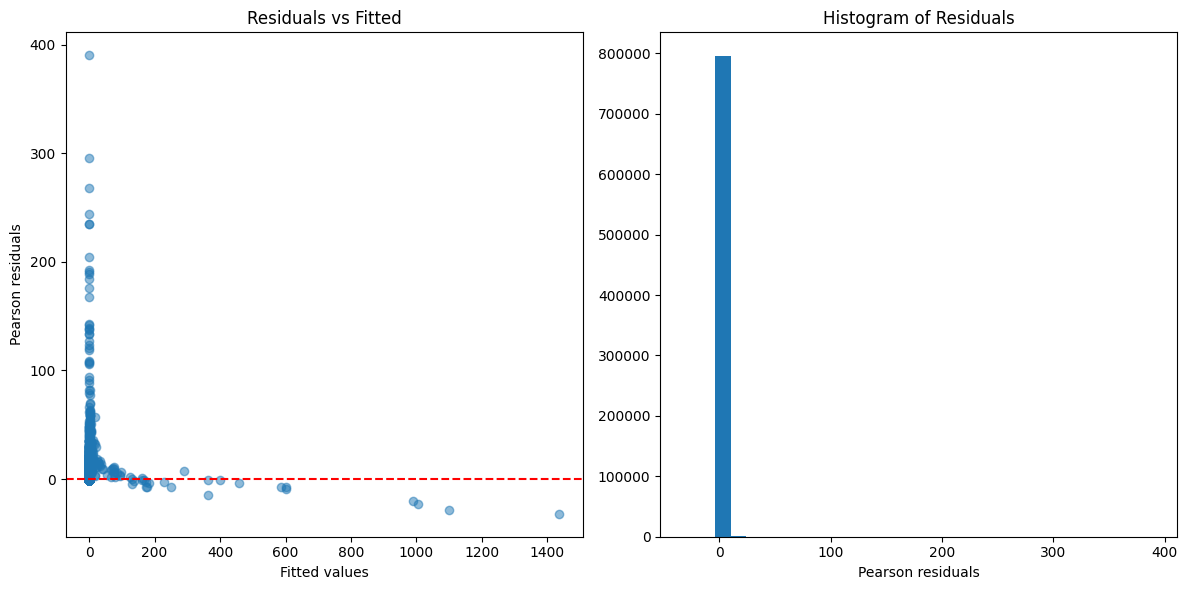

In [ ]:
df_crimes_clean = df_crimes.copy()
print(f"Missing values before cleaning: {df_crimes_clean.isnull().sum().sum()}")
df_crimes_clean = df_crimes_clean.fillna(0)  # fill missing values with zeros

X = df_crimes_clean.drop(['Month', 'LSOA code', 'Burglary'], axis=1)
y = df_crimes_clean['Burglary']

if (y < 0).any(): # cleaning possible negative values
    print("Warning: Negative values found in Burglary counts. Converting to absolute values.")
    y = y.abs()


X = sm.add_constant(X) # const term

print(f"burglary Mean: {y.mean()}, var: {y.var()}") # overdispersion check
print(f"overdispersion ratio: {y.var() / y.mean()}")


try:
    print("Trying standard NegativeBinomial...")
    nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
    print("Model fit successfully!")
except Exception as e1:
    print(f"Error with standard NegativeBinomial: {e1}")
    
    try:
        print("Trying NegativeBinomial with alpha=1.0...")
        nb_family = sm.families.NegativeBinomial(alpha=1.0)
        nb_model = sm.GLM(y, X, family=nb_family).fit()
        print("Model fit successfully!")
    except Exception as e2:
        print(f"Error with alpha initialization: {e2}")
        
        try:
            print("Falling back to Poisson regression...")
            nb_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
            print("Poisson model fit successfully!")
        except Exception as e3:
            print(f"Error with Poisson model: {e3}")
            
            print("Trying robust GLM estimation...")
            nb_model = sm.GLM(y, X, family=sm.families.Poisson()).fit_regularized(alpha=0.01, L1_wt=0)
            print("Robust model fit successfully!")

print("\nmodel summary:")
print(nb_model.summary())

irr = pd.DataFrame({
    'Crime_Type': X.columns,
    'IRR': np.exp(nb_model.params),
    'p-value': nb_model.pvalues
})

try:
    irr['Lower CI'] = np.exp(nb_model.conf_int()[0])
    irr['Upper CI'] = np.exp(nb_model.conf_int()[1])
except:
    print("Confidence intervals not available for this model type")

print("\nIncident Rate Ratios:")
print(irr.sort_values('IRR', ascending=False))

# IRR: for each one-unit increase in a crime type, burglary increases by (IRR-1)*100%
print("\nInterpretation example:")
top_predictor = irr.iloc[1].name  # skip constant
irr_value = irr.loc[top_predictor, 'IRR']
effect = (irr_value - 1) * 100
print(f"For each additional {top_predictor} crime, burglary increases by {effect:.2f}%")

from statsmodels.stats.outliers_influence import variance_inflation_factor ## multicollinearity check

print("\nChecking for multicollinearity (VIF):")
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values('VIF', ascending=False))
print("VIF > 10 indicates problematic multicollinearity")

residuals = nb_model.resid_pearson
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(nb_model.predict(), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Pearson residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Pearson residuals')

plt.tight_layout()
plt.show()

In [ ]:
## zero-inflated negative binomial model

# NaN again 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# check if many zeros in the data
zero_proportion = (df_crimes['Burglary'] == 0).mean()
print(f"Proportion of zeros in burglary data: {zero_proportion:.2%}")

X = df_crimes.drop(['Month', 'LSOA code', 'Burglary'], axis=1)
y = df_crimes['Burglary']

X_array = X.values
y_array = y.values

X_array = sm.add_constant(X_array) # add a constant term

exog_infl = X_array.copy()

zinb_model = sm.ZeroInflatedNegativeBinomialP(
    endog=y_array,
    exog=X_array,
    exog_infl=exog_infl
).fit()

print(zinb_model.summary())

# count model parameters
count_params = pd.DataFrame({
    'Crime_Type': ['const'] + X.columns.tolist(),
    'Coefficient': zinb_model.params[:X_array.shape[1]],
    'p-value': zinb_model.pvalues[:X_array.shape[1]]
})

# inflation model parameters 
infl_params = pd.DataFrame({
    'Crime_Type': ['const'] + X.columns.tolist(),
    'Coefficient': zinb_model.params[X_array.shape[1]:2*X_array.shape[1]],
    'p-value': zinb_model.pvalues[X_array.shape[1]:2*X_array.shape[1]]
})

print("count model parameters:")
print(count_params.sort_values('Coefficient', ascending=False))

print("\nzero-inflation model parameters:")
print(infl_params.sort_values('Coefficient', ascending=False))

# compare model fit with AIC/BIC
try:
    nb_model = sm.GLM(y_array, X_array, family=sm.families.NegativeBinomial()).fit() # regular negative binomial for comparasion
    
    print(f"\nAIC ZINB: {zinb_model.aic}")
    print(f"AIC NB: {nb_model.aic}")
    print(f"BIC ZINB: {zinb_model.bic}")
    print(f"BIC NB: {nb_model.bic}")
    print(f"Lower AIC/BIC indicates better model fit")
except:
    print("Could not compare models")

# zero_proportion is > 30%) -> zero-inflated model

Proportion of zeros in burglary data: 53.53%


c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:4329: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:3936: RuntimeWarning: invalid value encountered in subtract
  llf = (gammaln(y + a1) - gammaln(y + 1) - gammaln(a1) +
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\discrete\discr

         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112


c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\discrete\count_model.py:324: RuntimeWarning: invalid value encountered in multiply
  hess_arr[i, j + self.k_inflate] = -(score_main[zero_idx, j] *
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\20222358\OneDrive - TU Eindhov

                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 y   No. Observations:               189851
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                   189836
Method:                                      MLE   Df Model:                           14
Date:                           Tue, 06 May 2025   Pseudo R-squ.:                     nan
Time:                                   12:12:44   Log-Likelihood:                    nan
converged:                                 False   LL-Null:                   -2.3999e+05
Covariance Type:                       nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -26.8186        nan        nan        nan         nan         nan
inflate_x1     -158.7329        na

c:\Users\20222358\OneDrive - TU Eindhoven\Desktop\DC-2\Addressing-real-world-crime-and-security-problems-with-data-science\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
